In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ev=pd.read_csv("vahan.csv")
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64841 entries, 0 to 64840
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           64841 non-null  int64  
 1   month          64841 non-null  object 
 2   state          64841 non-null  object 
 3   rto            64841 non-null  object 
 4   vehicle_class  64841 non-null  object 
 5   fuel           64841 non-null  object 
 6   value          64841 non-null  int64  
 7   unit           64841 non-null  object 
 8   note           0 non-null      float64
dtypes: float64(1), int64(2), object(6)
memory usage: 4.5+ MB


In [7]:
ev_only = ev[ev['fuel'].str.lower() == 'electric(bov)']
ev_only

,year,month,state,rto,vehicle_class,fuel,value,unit,note
3,2025,April,Andaman and Nicobar Islands,All Vahan Running Office,M-CYCLE/SCOOTER,ELECTRIC(BOV),1,value in Absolute Number,NaN
32,2025,April,Andhra Pradesh,All Vahan Running Office,E-RICKSHAW WITH CART (G),ELECTRIC(BOV),16,value in Absolute Number,NaN
34,2025,April,Andhra Pradesh,All Vahan Running Office,E-RICKSHAW(P),ELECTRIC(BOV),3,value in Absolute Number,NaN
42,2025,April,Andhra Pradesh,All Vahan Running Office,GOODS CARRIER,ELECTRIC(BOV),5,value in Absolute Number,NaN
48,2025,April,Andhra Pradesh,All Vahan Running Office,M-CYCLE/SCOOTER,ELECTRIC(BOV),479,value in Absolute Number,NaN
...,...,...,...,...,...,...,...,...,...
64806,2022,April,West Bengal,All Vahan Running Office,M-CYCLE/SCOOTER,ELECTRIC(BOV),759,value in Absolute Number,NaN
64815,2022,April,West Bengal,All Vahan Running Office,MOTOR CAR,ELECTRIC(BOV),36,value in Absolute Number,NaN
64820,2022,April,West Bengal,All Vahan Running Office,MOTORISED CYCLE (CC > 25CC),ELECTRIC(BOV),56,value in Absolute Number,NaN
64830,2022,April,West Bengal,All Vahan Running Office,THREE WHEELER (GOODS),ELECTRIC(BOV),20,value in Absolute Number,NaN


In [9]:
ev_state_total = (
    ev_only.groupby('state')['value']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)
ev_state_total.columns = ['state', 'total_ev']
ev_state_total

,state,total_ev
0,Uttar Pradesh,793274
1,Maharashtra,474313
2,Karnataka,374839
3,Bihar,253242
4,Tamil Nadu,252214
5,Rajasthan,244182
6,Delhi,208092
7,Gujarat,201680
8,Kerala,175754
9,Madhya Pradesh,172366


In [10]:
top_5_ev_states = ev_state_total.head(5)['state'].tolist()


In [11]:
aqi=pd.read_csv("aqi.csv")

In [12]:
aqi_avg_state = (
    aqi.groupby('state')['aqi_value']
    .mean()
    .reset_index()
)
aqi_avg_state.columns = ['state', 'avg_aqi']
aqi_avg_state

,state,avg_aqi
0,Andaman and Nicobar Islands,57.706897
1,Andhra Pradesh,77.507701
2,Arunachal Pradesh,54.485265
3,Assam,114.117456
4,Bihar,157.158122
5,Chandigarh,141.561778
6,Chhattisgarh,78.986321
7,Delhi,206.416889
8,Gujarat,110.634272
9,Haryana,140.852806


In [14]:
aqi_avg_state['ev_group'] = aqi_avg_state['state'].apply(
    lambda x: 'High EV' if x in top_5_ev_states else 'Low EV'
)

In [15]:
comparison = aqi_avg_state.groupby('ev_group')['avg_aqi'].mean().reset_index()
print(comparison)


  ev_group     avg_aqi
0  High EV  103.530500
1   Low EV  101.327371


C:\Users\91935\AppData\Local\Temp\ipykernel_17816\4216201406.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=comparison, x='ev_group', y='avg_aqi', palette='Set2')


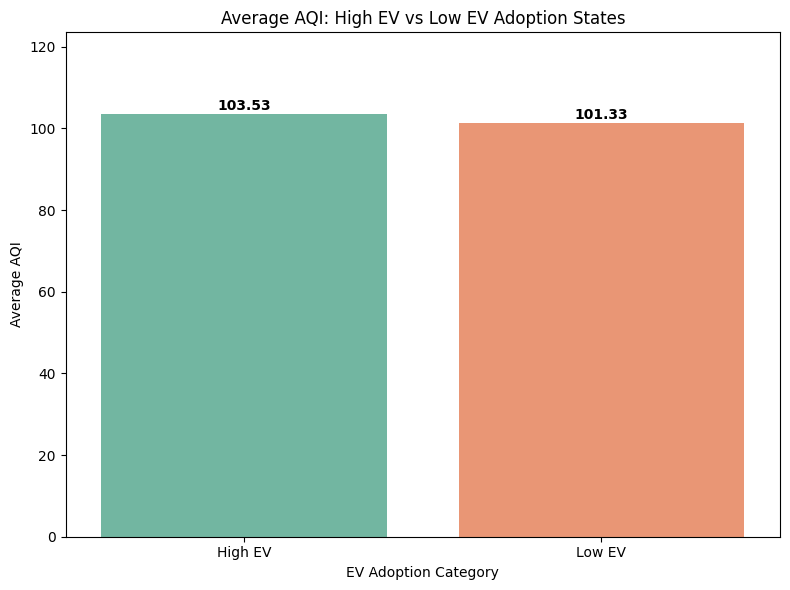

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the bar plot
plt.figure(figsize=(8, 6))
barplot = sns.barplot(data=comparison, x='ev_group', y='avg_aqi', palette='Set2')

# Add value labels on top of each bar
for index, row in comparison.iterrows():
    barplot.text(
        index,
        row.avg_aqi + 1,
        f"{row.avg_aqi:.2f}",
        color='black',
        ha='center',
        fontweight='bold'
    )

# Final plot adjustments
plt.title('Average AQI: High EV vs Low EV Adoption States')
plt.ylabel('Average AQI')
plt.xlabel('EV Adoption Category')
plt.ylim(0, comparison['avg_aqi'].max() + 20)
plt.tight_layout()
plt.show()
